# **Laboratorijska vježba 7**: Primijenjeno strojno učenje

> Analiza podataka četvrti je korak u uobičajenom slijedu koraka koje provodi podatkovni znanstvenik. Ova faza je ključna faza u znanosti o podacima, a uključuje izvođenje različitih tehnika za analizu podataka. U sklopu ovog koraka provodi se eksploratorna/potvrdna, prediktivna, regresijska ili kvalitativna analiza. 

> U ovoj laboratorijskoj vježbi proširit ćemo svoje znanje o prediktivnoj analizi. U sklopu ove analize uobičajeno se primjenjuju algoritmi strojnog učenja. U prethodnim laboratorijskim vježbama upoznali smo se s algoritmima za regresiju i klasfifikaciju. U ovoj laboratorijskoj vježbi posvetit ćemo se postupcima predobrade skupova podataka za potrebe strojnog učenja. U tu svrhu koristit ćemo biblioteku scikit-learn. 
---

# **Primijenjeno strojno učenje**

U prethodnim vježbama, koristili smo razne algoritme strojnog učenja na različitim skupovima podataka preuzetih s Interneta. Ovi skupovi podataka obično su prikladno uređeni za izvođenje algoritama strojnog učenja te ne zahtijevaju posebnu doradu. Međutim, skupovi podataka iz stvarnog svijeta često nisu prikladni za direktnu primjenu algoritama strojnog učenja te zahtijevaju posebnu predobradu. Primjena algoritama strojnog učenja na uređenim skupovima podataka nije pretjerano zahtjevan zadatak. S druge strane, određivanje podataka koje treba prikupiti, odabir ili izdvajanje relevantnih značajki, odabir odgovarajuće metode strojnog učenja, odabir metode evaluacije, interpretiranje i objava rezultata zahtijevaju od podatkovnog znanstvenika temeljito razumijevanje područja strojnog učenja te promatranog problema koji nastoji riješiti.

Algoritme strojnog učenja tipično primjenjujemo kroz sljedeće korake:

1.  Prikupljanje i predobrada podataka
2.  Izdvajanje značajki - na ulaz algoritma strojnog učenja dovode se podaci u obliku skupa primjeraka (ili instanci). Primjerci su u suštini reci u skupu podataka. Svaki je primjerak opisan vektorom značajki koje su ključne karakteristike tog primjerka. U ovom koraku potrebno je osmisliti na koji način prikazati skup značajki te implementirati postupke ekstrakcije značajki.
3.  Redukcija dimenzionalnosti - ovaj korak nije neophodan, ali može pomoći ukloniti redundantne, nevažne i štetne značajke. Uklanjanje takvih značajki u pravilu doprinosi performansama algoritma strojnog učenja.
4.  Odabir modela (engl. *model selection*) - ovo je važan korak u kojem se odabire prikladan algoritam strojnog učenja s "optimalnim" postavkama parametara za dani problem.
5.  Treniranje modela - algoritam strojnog učenja trenira se nad skupom podataka, odnosno uči način preslikavanja ulaznih u izlazne podatke. Može trajati od nekoliko sekundi do nekoliko tjedana.
6.  Vrednovanje modela - ovisno o tipu problema koji promatramo (regresija, klasifikacija, grupiranje,...), postoje razne mjere za vrednovanje performansi treniranog modela.
7.  Dijagnostika i ispravljanje - ako model ne radi na zadovoljavajućoj razini, potrebno ga je doraditi i poboljšati mu performanse.  
8.  Instalacija - model se u konačnici može ugraditi u produkciju gdje će odrađivati predviđeni posao.


## **Predobrada skupova podataka za potrebe strojnog učenja**

Predobrada skupova podataka za potrebe strojnog učenja obuhvaća prva tri koraka u gore navedenom nizu koraka: prikupljanje i predobradu podataka, izdvajanje značajki te redukciju dimenzionalnosti. Pretpostavit ćemo da već imamo prikupljeni skup podataka, koji zahtijeva daljnju predobradu. Cilj predobrade jest olakšati algoritmima učenje koncepata problema koji skup podataka opisuje, što će zauzvrat poboljšati njihove performanse.  

### **Predobrada značajki**

Značajke (engl. *features*) predstavljaju stupce u skupu podataka koji opisuju primjerke (retke). One mogu biti **kontinuirane** (primjerice, visina ili temperatura), **ordinalne** (primjerice, dobar-loš-zao) ili **kategoričke** (primjerice, spol ili nacionalnost). 

#### **Pretvaranje kategoričkih značajki u numeričke**

Neki algoritmi strojnog učenja znaju raditi samo s numeričkim značajkama. U tom slučaju, potrebno je **prebaciti kategoričke i ordinalne značajke u numeričke**. Postoji nekoliko tehnika za prebacivanje ovih značajki u numeričke, a najpoznatija od njih jest *one-hot encoding* (OHE). Tehnika OHE kodira ordinalnu ili kategoričku značajku u $m$ numeričkih značajki, pri čemu $m$ predstavlja broj mogućih vrijednosti koji ordinalna/kategorička značajka može poprimiti. Primjerice, značajka spol (M/F) se kodira u dvije značajke (is_M i is_F) jer postoji dva spola. Novostvorene značajke u pravilu sadrže binarne vrijednosti (0 ili 1), ovisno o tome koju vrijednost ima izvorna ordinalna/kategorička značajka. Tehniku OHE moguće je izvesti pomoću biblioteke scikit-learn.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df = pd.DataFrame({'gender': ['M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M']})
transformed = ohe.fit_transform(df[['gender']])
df[ohe.categories_[0]] = transformed.toarray()
df

,gender,F,M
0,M,0.0,1.0
1,M,0.0,1.0
2,F,1.0,0.0
3,F,1.0,0.0
4,F,1.0,0.0
5,M,0.0,1.0
6,M,0.0,1.0
7,F,1.0,0.0
8,M,0.0,1.0


#### **Diskretizacija značajki**

Neki algoritmi strojnog učenja bolje rade s diskretnim te ordinalnim nego s kontinuiranim značajkama (primjerice, stabla odluke). Diskretne značajke omogućavaju linearnom klasifikatoru da nauči nelinearne granice odluke. U tom slučaju, prigodno je napraviti **diskretizaciju značajki**. Diskretizacija dijeli kontinuiranu značajku u unaprijed zadan broj intervala koja se zatim tehnikom OHE pretvara u numeričke značajke. Iako se od numeričkih u konačnici opet dobiju numeričke značajke, konačne vrijednosti nisu kontinuirane nego kategoričke. 

**Postoje nenadzirane i nadzirane metode diskretizacije.** Najpoznatije nenadzirane metode diskretizacije jesu:

* Diskretizacija s ciljem jednake širine - raspon vrijednosti se dijeli u unaprijed zadani broj intervala koji imaju jednaku širinu (ova diskretizacija nije prikladna za iskrivljene podatke, koji primjerice slijede eksponencijalnu razdiobu).

* Diskretizacija s ciljem jednake frekvencije - raspon vrijednosti se dijeli u unaprijed zadani broj intervala tako da svaki interval ima jednaku količinu podataka (postoji mogućnost da su slični podaci u različitim intervalima jer ih ima puno). 

* Grupiranje

Ove metode je moguće primijeniti pomoću klase *KBinsDiscretizer* iz biblioteke *scikit-learn*. Nenadzirane metode diskretizacije ne uzimaju u obzir oznaku primjeraka (primjerice, oznaku klase ako je riječ o problemu klasifikacije). Stoga je lako moguće da jedan interval sadrži primjerke različitih klasa te da novostvorena diskretna značajka otežava klasifikaciju primjeraka. Nenadzirane metode diskretizacije uzimaju u obzir oznaku primjeraka pri stvaranju diskretnih značajki. No, takve tehnike diskretizacije su nešto složenije i rjeđe se koriste. 


Treba biti oprezan prilikom primjene diskretizacije jer ona povećava broj značajki, odnosno dimenzionalnost problema. Povećanje dimenzionalnosti problema povećava i mogućnost prenaučenosti algoritma strojnog učenja.

,x1,x2,label
0,0.405737,1.029044,0
1,0.409643,0.740260,1
2,0.431209,0.730267,1
3,0.227165,0.787158,0
4,0.214051,0.834933,1
5,0.180239,0.771882,1
6,0.097138,0.861144,0
7,0.347747,0.749925,1
8,0.195598,0.888774,0
9,0.139789,0.722128,0


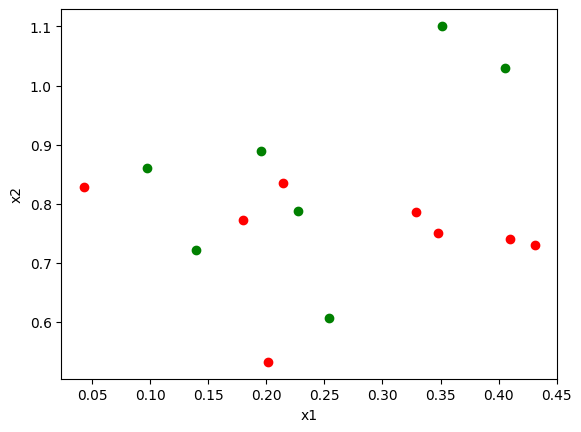

In [3]:
import matplotlib.pyplot as plt
df = pd.DataFrame({'x1': np.random.normal(0.2,0.15,size=15),
                   'x2': np.random.normal(0.8,0.15,size=15),
                   'label': [0,1,1,0,1,1,0,1,0,0,1,1,0,1,0]})

plt.scatter(df.query('label==0')['x1'], df.query('label==0')['x2'],c='green')
plt.scatter(df.query('label==1')['x1'], df.query('label==1')['x2'],c='red')
plt.xlabel('x1')
plt.ylabel('x2')
df

[array([0.04295381, 0.2370812 , 0.43120859])
 array([0.53235491, 0.81659407, 1.10083322])]


,x1,x2,x3,x4
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0
5,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0
7,0.0,1.0,1.0,0.0
8,1.0,0.0,0.0,1.0
9,1.0,0.0,1.0,0.0


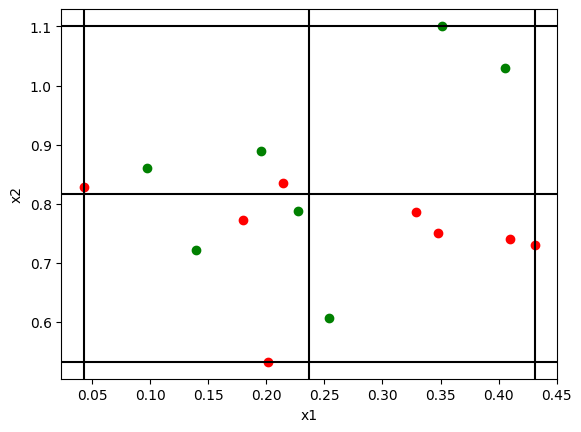

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
X = df.iloc[:,:-1]
est = KBinsDiscretizer(n_bins=2, encode='onehot', strategy='uniform')
transformed = est.fit_transform(X)
print(est.bin_edges_)

plt.axvline(x=est.bin_edges_[0][0], color='black')
plt.axvline(x=est.bin_edges_[0][1], color='black')
plt.axvline(x=est.bin_edges_[0][2], color='black')

plt.axhline(y=est.bin_edges_[1][0], color='black')
plt.axhline(y=est.bin_edges_[1][1], color='black')
plt.axhline(y=est.bin_edges_[1][2], color='black')

plt.scatter(df.query('label==0')['x1'], df.query('label==0')['x2'],c='green')
plt.scatter(df.query('label==1')['x1'], df.query('label==1')['x2'],c='red')
plt.xlabel('x1')
plt.ylabel('x2')

new_df = pd.DataFrame(transformed.toarray(), columns=['x'+str(i+1) for i in range(4)])
new_df

#### **Normalizacija značajki**

Neki algoritmi strojnog učenja ne rade dobro kada korištene značajke imaju vrlo različite raspone vrijednosti. Ako se rasponi vrijednosti značajki vrlo razlikuju, to može pogoršati performanse ili otežati podešavanje parametara algoritma. Algoritmi koji su osjetljivi na različite raspone značajki u pravilu su oni koji računaju udaljenosti između primjeraka (primjerice, SVM, $k$-NN, radijalna neuronska mreža,...). Ovi algoritmi daju veću važnost značajkama koje imaju velike apsolutne vrijednosti nego onima s manjim apsolutnim vrijednostima (primjerice, plaća je "važnija" od dobi ili visine i sl.). 


Stoga je poželjno svesti vrijednosti značajki na približno jednak interval, primjerice $[0,1]$. To se može postići normalizacijom pomoću koje se vrijednost svake značajke $x_i$ skalira u njezinu normaliziranu vrijednosti $x_i^{'}$. Postoji nekoliko različitih metoda normalizacije. Najpoznatije jesu logaritamsko skaliranje, min-max skaliranje te standardizacija pomoću $z$-vrijednosti. 

Logaritamskim skaliranjem vrijednost svake značajke $x_i$ skalira se u njezinu normaliziranu vrijednost

$$ x_i^{'} = \text{log}(x_i) . $$

Logaritamsko skaliranje je pogodno kada vrijednosti značajke slijede eksponencijalnu distribuciju. 

Min-max skaliranjem vrijednost svake značajke $x_i$ skalira se u njezinu normaliziranu vrijednost 

$$ x_i^{'} = \frac{x_i - x_{i,min}}{x_{i,max}-x_{i,min}}, \qquad i=1,\dots,d, $$

gdje je $x_{i,min}$ najmanja, a $x_{i,max}$ najveća vrijednost značajke $x_i$ u skupu podataka, dok $d$ predstavlja broj značajki, odnosno dimenzionalnost skupa podataka. Vrijednost normalizirane značajke nalazi se u intervalu $[0,1]$. Ova metoda jedna je od najčešćih načina normalizacije, no nije pogodna u slučaju kada značajka ima stršeće vrijednosti (*outliers*). U tom slučaju će stršeća vrijednost imati vrijednost $0$ ili $1$, dok će ostale vrijednosti biti zbližene na drugom kraju intervala. 

Standardizacijom pomoću $z$-vrijednosti, vrijednost svake značajke $x_i$ skalira se u njezinu normaliziranu vrijednost

$$ x_i^{'} = (x_i-\mu_i)/\sigma_i , $$

gdje je $\mu_i$ prosječna vrijednost značajke $x_i$, a $\sigma_i$ njezina standardna devijacija. Vrijednost normalizirane značajke proizlazi iz normalne distribucije čiji je centar $0$, a standardna devijacija $1$. Ova metoda normalizacije nije osjetljiva na stršćeće vrijednosti kao min-max skaliranje, no ne stvara identične intervale za svaku značajku.

Odabir prikladne metode normalizacije ovisi o karakteristikama skupa podataka te se u praksi svodi na odabir prema njihovu doprinosu performansama odabranog algoritma strojnog učenja. Ove metode normalizacije moguće je provesti pomoću biblioteke scikit-learn. 



,x1,x2,label
0,0.395881,128.719683,0
1,0.565904,111.649501,1
2,0.389285,70.634741,1
3,0.413138,86.346340,0
4,0.533376,86.273556,1
5,0.075477,108.589479,1
6,0.522950,80.140606,0
7,0.309238,100.558204,1
8,0.747828,108.213109,0
9,0.505519,86.085355,0


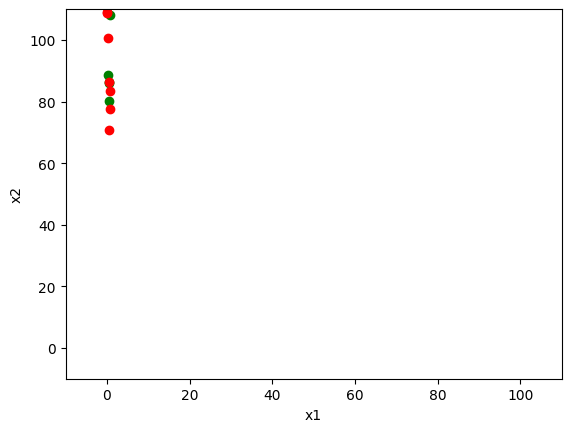

In [5]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({'x1': np.random.normal(0.5,0.25,size=15),
                   'x2': np.random.normal(100,20,size=15),
                   'label': [0,1,1,0,1,1,0,1,0,0,1,1,0,1,0]})

plt.scatter(df.query('label==0')['x1'], df.query('label==0')['x2'],c='green')
plt.scatter(df.query('label==1')['x1'], df.query('label==1')['x2'],c='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-10,110])
plt.ylim([-10,110])
df

,x1,x2,label
0,0.286730,1.000000,0.0
1,0.438884,0.706117,1.0
2,0.280827,0.000000,1.0
3,0.302173,0.270493,0.0
4,0.409775,0.269240,1.0
5,0.000000,0.653435,1.0
6,0.400444,0.163655,0.0
7,0.209193,0.515167,1.0
8,0.601689,0.646955,0.0
9,0.384845,0.266000,0.0


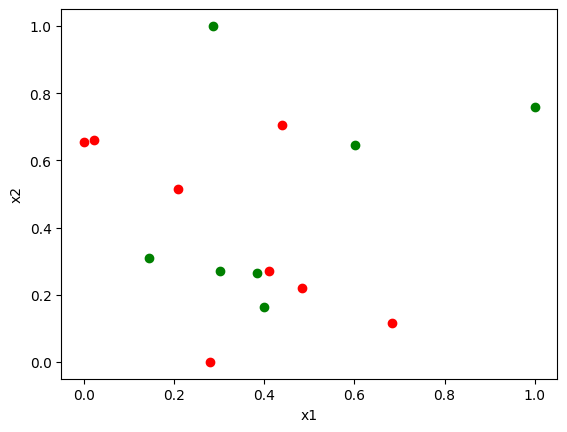

In [6]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
new_df = pd.DataFrame(scaled, columns=['x1', 'x2', 'label'])
plt.scatter(new_df.query('label==0')['x1'], new_df.query('label==0')['x2'],c='green')
plt.scatter(new_df.query('label==1')['x1'], new_df.query('label==1')['x2'],c='red')
plt.xlabel('x1')
plt.ylabel('x2')
new_df

### **Odabir značajki**

**Odabir značajki** (engl. *feature selection*) važan je postupak predobrade skupa podataka kojim se ostvaruje smanjenje dimenzionalnosti problema klasifikacije te poboljšava izvedba raznih klasifikatora. 

Jedan od početnih koraka pri izvođenju zadatka klasifikacije jest definiranje i **izdvajanje značajki** (engl. *feature extraction*) koje opisuju primjerke u skupu podataka. Broj takvih značajki određuje dimenzionalnost problema klasifikacije, a njihove vrijednosti definiraju položaj primjeraka u ulaznom prostoru. U stvarnim problemima klasifikacije, značajke se obično određuju intuitivno ili pak pomoću raznih postupaka koji izdvajaju niz vrijednosti iz slika, teksta, zvuka, raznih signala i drugih izvora. Idealan postupak izdvajanja značajki izdvojio bi minimalan broj značajki na temelju kojih je moguće odrediti jasnu granicu između klasa. Takva raspodjela primjeraka čini zadatak klasifikatora trivijalnim i omogućuje mu postizanje visoke razine uspješnosti klasifikacije. Međutim, zbog nemogućnosti određivanja relevantnih značajki unaprijed, stvarni skupovi podataka u pravilu uključuju i značajke koje ne doprinose razlikovanju primjeraka različitih klasa ili ga čak i narušavaju uspostavljanjem raznih nepoželjnih unutarnjih karakteristika skupa podataka. Osim toga, nije neuobičajeno da se primjerci opisuju velikim brojem različitih značajki, što može dovesti do problema koji se kolokvijalno naziva **"prokletstvo dimenzionalnosti"** (engl. curse of dimensionality). Ovaj problem predočava činjenicu da povećanje dimenzionalnosti problema povlači potrebu za još većim rastom broja primjeraka u skupu podataka, kako bi se jasnije predstavili koncepti klasa u takvom prostoru. S ciljem izbjegavanja navedenih problema, nakon izdvajanja značajki obično se odabiru samo najprikladnije među njima, što je zadatak raznih pristupa za odabir značajki.


**Cilj pristupa za odabir značajki jest odabrati relativno mali podskup dostupnih značajki prema određenom kriteriju, što obično dovodi do manje složenosti, lakše interpretabilnosti i kvalitetnije izvedbe treniranih klasifikacijskih modela**. Smanjivanjem dimenzionalnosti problema klasifikacije, smanjuje se i udaljenost postojećih manjinskih primjeraka u ulaznom prostoru, što olakšava učenje koncepta klasa. Metode za odabir značajki uobičajeno se dijele na filtre, omotače, ugrađene metode i hibridne metode, pri čemu su filtri i omotači najpoznatije. 


#### **Filtri za odabir značajki**

Filtri rangiraju pojedine značajke na temelju mjera općih karakteristika podataka (poput dosljednosti, udaljenosti, količine informacije i korelacije) te odabiru unaprijed zadani broj najbolje rangiranih značajki. Broj odabranih značajki jedan je od parametara takvog pristupa, a njegovo podešavanje nije trivijalan zadatak. Povrh toga, odabiranje isključivo najbolje rangiranih značajki ne podrazumijeva nužno i ostvarivanje najviše razine uspješnosti klasifikacije. Štoviše, rangiranjem značajki potencijalno se mogu odbaciti značajke koje su same po sebi slabo relevantne, ali u kombinaciji s drugima uvelike olakšavaju razlikovanje primjeraka različitih klasa. Jedan od najpoznatijih filtara zasniva se na Pearsonovu koeficijentu korelacije

$$ r = \frac{\sum_{i=1}^N (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}}  . $$

Pearsonov koeficijent korelacije govori koliko je jaka linearna korelacija između kontinuiranih značajki. Ako dvije ili više nezavisnih značajki imaju visok stupanj korelacije, tada se mogu smatrati redundantnim ili dupliciranim značajkama te se mogu odbaciti. Kada su nezavisne značajke visoko korelirane, promjena u jednoj značajki uzrokovala bi promjenu u drugoj, pa bi performanse algoritma strojnog učenja značajno fluktuirale. 

Jedan od poznatijih filtara, koji je prigodan za kategoričke značajke, jest zajednička informacija (engl. *mutual information*) između značajke i oznake. Ova mjera određuje koliko informacije neka značajka i oznaka klase dijele, odnosno koliko se može saznati o jednoj varijabli ako znamo vrijednosti druge varijable. Ako je zajednička informacija jednaka 0, znači da iz vrijednosti značajke ne možemo pretpostaviti ništa o oznakama klase. Stoga je cilj da ova mjera bude što veća za značajku, a ovaj filtar želi zadržati takve značajke. Zajednička informacija između značajke $F$ i klase $C$ računa se kao

$$ I(F;C) = -\sum_i P(f_i) \text{log}_2 P(f_i) -\sum_i P(c_i) \text{log}_2 P(c_i) + \sum_i \sum_j P(f_i, c_j) \text{log}_2 P(f_i,c_j) , $$

gdje je $P(f_i)$ vjerojatnost pojavljivanja vrijednosti $f_i$ za značajku $F$, $P(c_i)$ vjerojatnost pojavljivanja vrijednosti $c_i$ za značajku $C$, a $P(f_i,c_i)$ zajednička vjerojatnost pojavljivanja vrijednosti $f_i$ i $c_i$. 

**Pearsonov koeficijent korelacije prigodan je za mjerenje veze između kontinuiranih vrijednosti** (primjerice, kontinuirana značajka i kontinuirana oznaka kod regresije), dok je **zajednička informacija prigodna za mjerenje veze između kategoričkih značajki i kategoričkih oznaka klasa**. Ako su značajke kontinuirane, a oznake kategoričke (odnosno, problem je klasifikacijski), prigodna mjera za mjerenje veze između njih je **F-vrijednost ANOVA testa korelacije**.



Modul feature_selection iz biblioteke scikit-learn nudi jednostavan način za izvođenje navedenih filtara. Funkcije *SelectKBest()* i *SelectPercentile()* zadržavaju najbolje rangiranih $K$ značajki, odnosno postotak najbolje rangiranih značajki. Ove funkcije kao parametar primaju neku od mjera na kojima je zasnovan filtar (primjerice, Pearsonov koeficijent korelacije, F-vrijednost ANOVA testa korelacije, zajedničku informaciju i sl.). 

Prije FS:  0.64
Odaabrane značajke: 
['x3' 'x5']
Nakon FS:  0.65


Text(0, 0.5, 'x2')

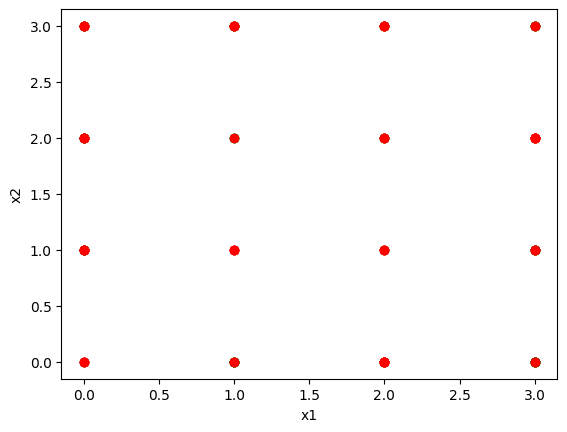

In [7]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
np.random.seed(42)
size = 100
df = pd.DataFrame({'x1': np.random.choice([0,1,2,3],size=size),
                   'x2': np.random.choice([0,1,2,3],size=size),
                   'x3': np.random.choice([0,1,2,3],size=size),
                   'x4': np.random.choice([0,1,2],size=size),
                   'x5': np.random.choice([0,1,2,3],size=size),
                   'label': np.random.choice([0,1], size=size)})

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
knn = KNeighborsClassifier(n_neighbors=7).fit(X,y)
print("Prije FS: ", accuracy_score(y, knn.predict(X)))

skb = SelectKBest(mutual_info_classif, k=2)
X_new = skb.fit_transform(X,y)
print("Odaabrane značajke: ")
print(skb.get_feature_names_out())
knn = KNeighborsClassifier(n_neighbors=7).fit(X_new,y)
print("Nakon FS: ", accuracy_score(y, knn.predict(X_new)))
new_df = pd.DataFrame(X_new, columns=['x1', 'x2'])
new_df['label'] = y
plt.scatter(new_df.query('label==0')['x1'], new_df.query('label==0')['x2'],c='green')
plt.scatter(new_df.query('label==1')['x1'], new_df.query('label==1')['x2'],c='red')
plt.xlabel('x1')
plt.ylabel('x2')


#### **Omotači za odabir značajki**

Filtri odvajaju postupak odabira značajki od postupka treniranja algoritma strojnog učenja izbjegavajući pri tome pristranost dobivenog podskupa značajki određenom algoritmu. Osim neovisnosti o algoritmu, prednost filtara je i manja vremenska složenost u odnosu na ostale metode za odabir značajki. S druge strane, filtri ne uzimaju u obzir složene interakcije između značajki te zanemaruju učinak dobivenog podskupa na performanse algoritma strojnog učenja.

Omotači nastoje prevladati nedostatke filtara koristeći performanse algoritma strojnog učenja za određivanje kvalitete podskupa značajki. Oni u suštini predstavljaju mehanizam pretraživanja koji tretira algoritam kao crnu kutiju ("omotava" ga) čije su performanse dio funkcije cilja pretrage. Postupak
pretraživanja predlaže rješenja koje algoritam koristi za treniranje. Trenirani model zatim se vrednuje na odvojenom skupu podataka za vrednovanje (engl. *validation set*) i omotaču se vraća kvaliteta tog rješenja na temelju koje donosi daljnje odluke. Funkciju cilja najčešće čini neka od mjera uspješnosti algoritma strojnog učenja ili pak složenija mjera koja uključuje i broj odabranih značajki.

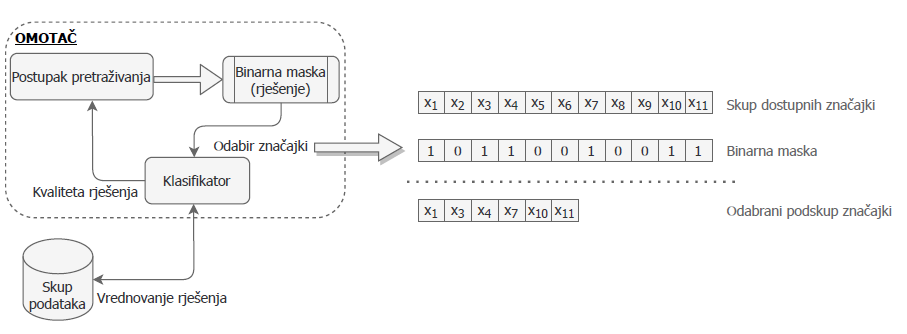



**Iscrpno pretraživanje** (engl. *exhaustive search*) jedini je postupak pretraživanja koji jamči pronalazak optimalnog podskupa značajki, ali uglavnom nije provediv zbog velikog broja mogućih rješenja ($2^d-1$). Omotači stoga obavljaju djelomično pretraživanje, koje je usmjereno oko podskupova značajki za koje odabrani algoritam ostvaruje visoke performanse. Jedan od najjednostavnijih omotača jest nasumična pretraga [98] koja uzastopno stvara nasumične podskupove značajki, a najkvalitetniji među njima odabire se kao konačno rješenje. Sustavniju pretragu provode omotači poput **slijedne pretrage unaprijed** (engl. *sequential forward selection*, SFS) i **slijedne pretrage unazad** (engl. *sequential backward selection*, SBS), koji u osnovi redom dodaju ili uklanjaju jednu po jednu značajku te popratno vrednuju kvalitetu izvedenog podskupa. S dodavanjem, odnosno uklanjanjem značajki, prestaje se kad ono više ne doprinosu poboljšanju performansi odabranog algoritma. Omotači u pravilu pronalaze kvalitetnije podskupove značajki od ostalih pristupa, no uz rizik njihove pretjerane prilagodbe korištenom skupu za vrednovanje te odabranom algoritmu. Ove omotače moguće je izvesti pomoću klase *SequentialFeatureSelector* iz biblioteke *scikit-learn*, pri čemu parametar *direction* definira radi li se o SFS ili SBS metodi.

Prije FS:  0.59
Odabrane značajke pomoću SFS: ['x1' 'x5']
Nakon FS:  0.75


Text(0, 0.5, 'x2')

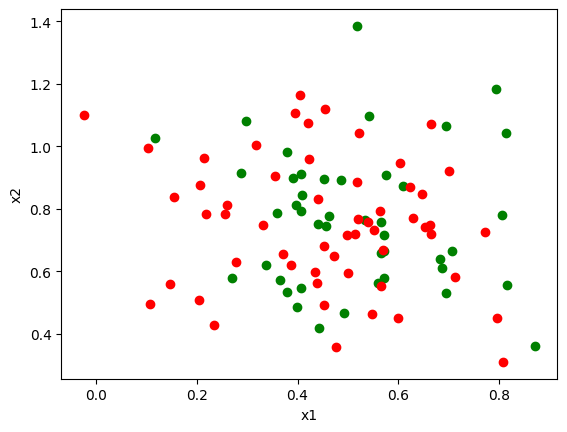

In [8]:
from sklearn.feature_selection import SequentialFeatureSelector

np.random.seed(42)
size = 100
df = pd.DataFrame({'x1': np.random.normal(0.5,0.2, size=size),
                   'x2': np.random.normal(0.2,0.2, size=size),
                   'x3': np.random.normal(0.8,0.2, size=size),
                   'x4': np.random.normal(0.35,0.2, size=size),
                   'x5': np.random.normal(0.77,0.2, size=size),
                   'label': np.random.choice([0,1], size=size)})

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=7).fit(X,y)
print("Prije FS: ", accuracy_score(y, knn.predict(X)))
sfs = SequentialFeatureSelector(knn, n_features_to_select=2, direction='forward').fit(X,y)
feature_names = np.array(df.columns[0:-1])
print(
    "Odabrane značajke pomoću SFS: "
    f"{feature_names[sfs.get_support()]}"
)

X_new = df[[f for f in feature_names[sfs.get_support()]]]
knn = KNeighborsClassifier(n_neighbors=7).fit(X_new,y)
print("Nakon FS: ", accuracy_score(y, knn.predict(X_new)))
new_df = pd.DataFrame(X_new)
new_df['label'] = y

plt.scatter(new_df.query('label==0').iloc[:,0], new_df.query('label==0').iloc[:,1],c='green')
plt.scatter(new_df.query('label==1').iloc[:,0], new_df.query('label==1').iloc[:,1],c='red')
plt.xlabel('x1')
plt.ylabel('x2')

Glavno ograničenje omotača SFS i SBS jest nemogućnost ponovnog vrednovanja korisnosti određene značajke u kasnijoj fazi, nakon što je donesena odluka o njezinu zadržavanju ili izbacivanju (tzv. "efekt gniježđenja"). Omotači stoga sve češće zasnivaju svoj rad na upotrebi **bio-inspiriranih algoritama optimizacije** koji omogućavaju usmjereno pretraživanje velikog prostora pretrage. Ovi algoritmi smatraju se valjanim izborom za omotače jer zahvaljujući načinu obavljanja pretrage mogu otkriti složene interakcije između značajki. 

### **Uzorkovanje neuravnoteženih skupova podataka**

Skupovi podataka u pravilu obuhvaćaju razne unutarnje karakteristike koje povećavaju njihovu složenost te općenito narušavaju izvedbu ovih algoritama. Neuravnoteženost klasa, koja se izražava neravnomjernom raspodjelom oznaka različitih klasa u skupu podataka, jedna je od najistaknutijih takvih karakteristika. U neuravnoteženim skupovima podataka, oznaka jedne klase (tzv. manjinske klase) značajno je slabije zastupljena u odnosu na oznake drugih klasa. Brojni problemi klasifikacije po prirodi su neuravnoteženi, a neki od istaknutijih proizlaze iz područja primjene poput biomedicine, financija, informacijske tehnologije, industrijske proizvodnje te upravljanja sigurnosti. 

Pri učenju iz neuravnoteženih skupova podataka, algoritmi strojnog učenja obično iskazuju pristranost većinskoj klasi. Drugim riječima, procedure treniranja većine algoritama će nastojati maksimizirati broj točno predviđenih primjeraka, neovisno o njihovoj klasi. Ako je skup podataka izrazito neuravnotežen, algoritmima će biti "isplativo" proglasiti cijeli ulazni prostor područjem većinske klase jer će tako maksimizirati broj točno predviđenih primjeraka. Takvi algoritmi se stoga ponašaju nalik **trivijalnom većinskom klasifikatoru**, koji svakom primjerku dodjeljuje oznaku većinske klase. Njihova točnost prepoznavanja manjinske klase je neznatna, često blizu 0%.

Ovu poteškoću dodatno otežava činjenica da je u brojnim neuravnoteženim problemima upravo prepoznavanje rijetkih događaja od **primarne važnosti**, primjerice, u problemima medicinske dijagnostike, prepoznavanju izraza lica te otkrivanju upada, grešaka ili prijevara. S obzirom na složenost i zastupljenost problema neuravnoteženosti klasa, nije iznenađujuće da je predloženo mnoštvo pristupa za njegovo ublažavanje. Glavni cilj ovih pristupa jest **poboljšati uspješnost prepoznavanja manjinske klase, bez narušavanja opće izvedbe klasifikacije**. Neki od njih temelje se na izmjeni procedure treniranja klasifikacijskog modela ili načina vrednovanja njegove izvedbe i to primarno uvrštavanjem većeg troška za neprepoznavanje manjinskih primjeraka. S druge strane, pristupi na razini podataka jedini provode predobradu skupa podataka s ciljem ublažavanja stupnja neuravnoteženosti klasa i složenosti koncepta manjinske klase. Predstavnici ovih pristupa jesu metode **poduzorkovanja** (engl. *undersampling*) i **preuzorkovanja** (engl. *oversampling*). 

#### **Poduzorkovanje**

Metode poduzorkovanja stvara podskup izvornog skupa podataka uklanjajući primjerke većinske klase kako bi se postigla uravnoteženija raspodjela primjeraka različitih klasa. Najjednostavniji predstavnik metoda poduzorkovanja jest nasumično poduzorkovanje (engl. *random undersampling*). Ova metoda nasumično odabire primjerke većinske klase i uklanja ih iz izvornog skupa podataka. Na ovaj način umanjuje se stupanj neuravnoteženosti skupa podataka. Ipak, treba upozoriti na to da uklanjanjem nasumičnih primjeraka većinske klase, algoritam može propustiti važne koncepte koji se odnose na tu klasu. Nasumično poduzorkovanje jednostavno se može provesti korištenjem biblioteke *imblearn*.

CAC prije poduzorkovanja 0.83


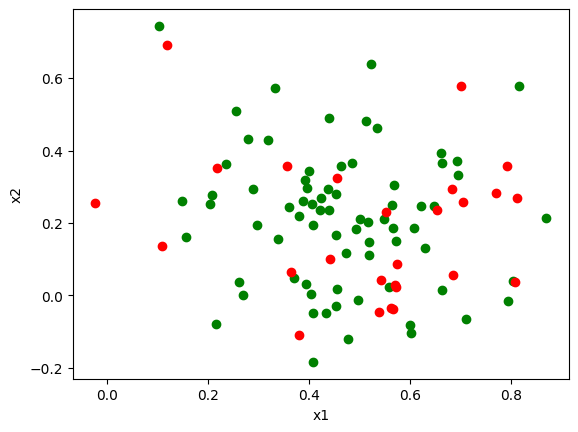

In [9]:
from imblearn.under_sampling import RandomUnderSampler

np.random.seed(42)
size = 100
df = pd.DataFrame({'x1': np.random.normal(0.5,0.2, size=size),
                   'x2': np.random.normal(0.2,0.2, size=size),
                   'label': np.random.choice([0,1], size=size)})

rnd_indices = np.random.choice(len(df), size=round(size*0.75))
df.loc[rnd_indices,'label'] = 0

plt.scatter(df.query('label==0').iloc[:,0], df.query('label==0').iloc[:,1],c='green')
plt.scatter(df.query('label==1').iloc[:,0], df.query('label==1').iloc[:,1],c='red')
plt.xlabel('x1')
plt.ylabel('x2')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.describe()


knn = KNeighborsClassifier(n_neighbors=3).fit(X,y)
print("CAC prije poduzorkovanja", accuracy_score(y, knn.predict(X)))



CAC poslije poduzorkovanja 1.0


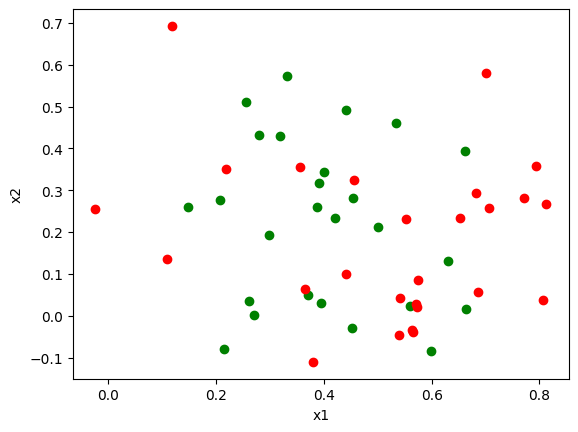

In [10]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = undersample.fit_resample(X, y)

new_df = pd.DataFrame(X_new)
new_df['label'] = y_new

plt.scatter(new_df.query('label==0').iloc[:,0], new_df.query('label==0').iloc[:,1],c='green')
plt.scatter(new_df.query('label==1').iloc[:,0], new_df.query('label==1').iloc[:,1],c='red')
plt.xlabel('x1')
plt.ylabel('x2')
y_new.describe()

knn = KNeighborsClassifier(n_neighbors=3).fit(X_new,y_new)
print("CAC poslije poduzorkovanja", accuracy_score(y_new, knn.predict(X_new)))

#### **Preuzorkovanje**

Metoda preuzorkovanja stvara nadskup izvornog skupa podataka stvaranjem novih primjeraka manjinske klase. Najjednostavniji predstavnik metoda preuzorkovanja jest nasumično preuzorkovanje (engl. *random oversampling*). Ova metoda nasumično odabire primjerke manjinske klase te ih duplicira dok se ne postigne željena razina uravnoteženosti. Na ovaj način umanjuje se stupanj neuravnoteženosti skupa podataka. Ipak, treba upozoriti da umnožavanje postojećih primjeraka može dovesti do gomilanja šuma te do prenaučenosti algoritma. Nasumično preuzorkovanje jednostavno se može provesti korištenjem biblioteke *imblearn*.

CAC prije preuzorkovanja 0.83


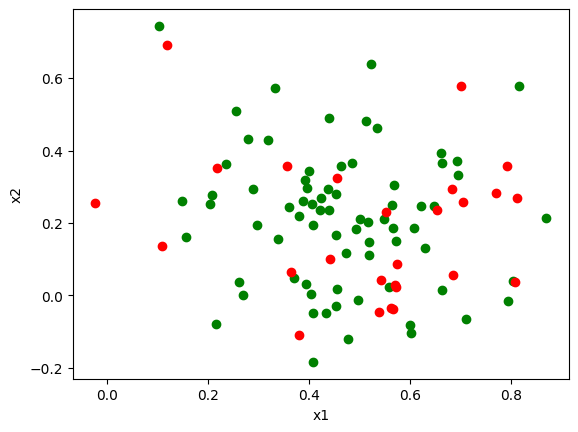

In [18]:
from imblearn.over_sampling import RandomOverSampler

np.random.seed(42)
size = 100
df = pd.DataFrame({'x1': np.random.normal(0.5,0.2, size=size),
                   'x2': np.random.normal(0.2,0.2, size=size),
                   'label': np.random.choice([0,1], size=size)})

rnd_indices = np.random.choice(len(df), size=round(size*0.75))
df.loc[rnd_indices,'label'] = 0

plt.scatter(df.query('label==0').iloc[:,0], df.query('label==0').iloc[:,1],c='green')
plt.scatter(df.query('label==1').iloc[:,0], df.query('label==1').iloc[:,1],c='red')
plt.xlabel('x1')
plt.ylabel('x2')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.describe()


knn = KNeighborsClassifier(n_neighbors=3).fit(X,y)
print("CAC prije preuzorkovanja", accuracy_score(y, knn.predict(X)))

CAC poslije preuzorkovanja 1.0


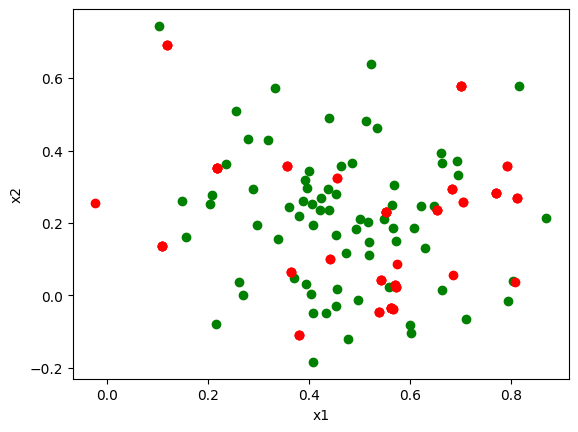

In [19]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_new, y_new = oversample.fit_resample(X, y)

new_df = pd.DataFrame(X_new)
new_df['label'] = y_new

plt.scatter(new_df.query('label==0').iloc[:,0], new_df.query('label==0').iloc[:,1],c='green')
plt.scatter(new_df.query('label==1').iloc[:,0], new_df.query('label==1').iloc[:,1],c='red')
plt.xlabel('x1')
plt.ylabel('x2')
y_new.describe()

knn = KNeighborsClassifier(n_neighbors=3).fit(X_new,y_new)
print("CAC poslije preuzorkovanja", accuracy_score(y_new, knn.predict(X_new)))

## **Odabir modela**

Svaki algoritam strojnog učenja u suštini trenira model nad raspoloživim podacima za treniranje (engl. *training set*), s ciljem pronalaženja optimalne hipoteze, odnosno one hipoteze koja predviđa oznaku primjerka uz minimalnu pogrešku. Prije samog treniranja, u pravilu se odabire složenost modela podešavanjem njegovih hiperparametara, odnosno parametara algoritma. Obično se preferiraju jednostavniji modeli s obzirom na to da složeniji mogu uzrokovati **prenaučenost** (engl. *overfitting*) algoritma, smanjujući time njegovu sposobnost generalizacije. S druge strane, odabir previše jednostavnih modela dovodi do **podnaučenosti** (engl. *underfitting*) algoritma koji stoga ne uspijeva ostvariti zadovoljavajuću izvedbu ni na skupu za treniranje. Kako bi se procijenila sposobnost generalizacije algoritma, izvedba treniranog modela obično se testira na skupu za testiranje (engl. *test set*) koji čine primjerci iz skupa podataka izdvojeni prethodno treniranju modela. Najčešći postupci raspodjele skupa podataka za potrebe testiranja su postupak izdvajanja (engl. *holdout*) te postupak unakrsne provjere k preklopa (engl. *k-fold cross-validation*).

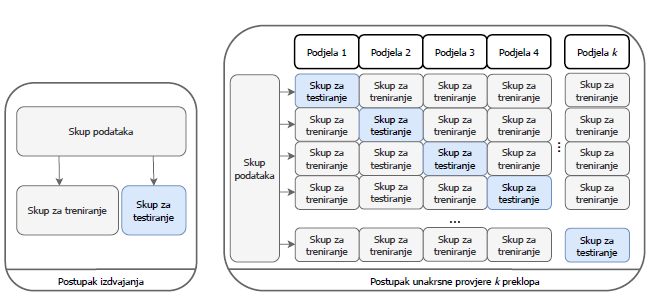



Pri podešavanju hiperparametara algoritma, uglavnom se testiraju različite vrijednosti iz nekog predefiniranog skupa vrijednosti. Ako neki algoritam ima više hiperparametara, obično se formira mreža njihovih kombinacija vrijednosti te se testiraju sve kombinacije. U biblioteci scikit-learn to je moguće postići korištenjem klase *GridSearchCV*. Ova klasa ima *fit* metodu koja trenira sve modele s različitim kombinacijama parametara te ih vrednuje na odvojenim podskupovima za vrednovanje. Interno se provodi postupak unakrsne provjere $k$ preklopa, kako bi se izdvojili podskupovi za treniranje i vrednovanje. 

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

np.random.seed(42)
size = 100
df = pd.DataFrame({'x1': np.random.normal(0.5,0.2, size=size),
                   'x2': np.random.normal(0.2,0.2, size=size),
                   'x3': np.random.normal(0.8,0.2, size=size),
                   'x4': np.random.normal(0.35,0.2, size=size),
                   'x5': np.random.normal(0.77,0.2, size=size),
                   'label': np.random.choice([0,1], size=size)})

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

parameters = {'kernel': ('linear', 'rbf'), 'C': [1,5,10,50,100]}
svc = SVC()

clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
results_df =pd.DataFrame(clf.cv_results_)
print("CAC na testu: ", accuracy_score(clf.predict(X_test), y_test))
results_df



CAC na testu:  0.5666666666666667


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005605,0.003452,0.004297,0.003450,1,linear,"{'C': 1, 'kernel': 'linear'}",0.500000,0.571429,0.571429,0.571429,0.571429,0.557143,0.028571,1
1,0.002295,0.000055,0.001707,0.000011,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.428571,0.500000,0.428571,0.428571,0.571429,0.471429,0.057143,2
2,0.002237,0.000032,0.001692,0.000055,5,linear,"{'C': 5, 'kernel': 'linear'}",0.428571,0.357143,0.285714,0.428571,0.428571,0.385714,0.057143,8
3,0.002340,0.000019,0.001692,0.000014,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.285714,0.428571,0.428571,0.285714,0.357143,0.357143,0.063888,10
4,0.002291,0.000058,0.001995,0.000536,10,linear,"{'C': 10, 'kernel': 'linear'}",0.500000,0.357143,0.285714,0.428571,0.500000,0.414286,0.083299,6
5,0.002618,0.000352,0.001733,0.000027,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.285714,0.500000,0.357143,0.500000,0.428571,0.414286,0.083299,6
6,0.003112,0.000565,0.002117,0.000546,50,linear,"{'C': 50, 'kernel': 'linear'}",0.428571,0.428571,0.357143,0.428571,0.500000,0.428571,0.045175,4
7,0.002681,0.000064,0.001715,0.000039,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.428571,0.428571,0.214286,0.428571,0.428571,0.385714,0.085714,8
8,0.003142,0.000650,0.001808,0.000229,100,linear,"{'C': 100, 'kernel': 'linear'}",0.428571,0.428571,0.357143,0.428571,0.500000,0.428571,0.045175,4
9,0.003066,0.000210,0.001845,0.000206,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.500000,0.428571,0.285714,0.357143,0.571429,0.428571,0.101015,3


Potrebno je naglasiti da se pri odabiru modela, skup podataka mora podijeliti na tri podskupa: za treniranje, vrednovanje i testiranje. Prva dva se koriste za odabir modela, dok treći (kao i prije) služi za uvid u generalizaciju odabranog algoritma strojnog učenja. Drugim riječima, na podskupu za testiranje uspoređujemo performanse **različitih algoritama strojnog učenja**, dok na podskupu za vrednovanje uspoređujemo performanse **istog algoritma, ali s različitim postavkama parametara**.

Kad skup podataka nema dovoljno podataka da bi se podijelio na podskupove za trening, vrednovanje i testiranje, obično se provodi postupak unakrsne provjere k preklopa. 

# **Literatura**


---

[1] Materijali za predmet Applied Data Analysis (ADA) na EPFL

[2] McKinney, W., 2012. *Python for data analysis*. O'Reilly Media, Inc.

[3] Materijali za predmet Strojno učenje na FER (https://strojnoucenje.takelab.fer.hr/)